In [4]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline
import cv2

from keras.applications.vgg16 import decode_predictions
from keras.applications.resnet50 import decode_predictions
import codecs
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
from numpy  import expand_dims
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

In [13]:
#include_top이 포함되지 않은 ver.=feature가 나옴

#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False) 
#출력 레이어를 포함할 것인지 여부로 개별문제에 적합하게 되어있다면 불필요
#weights:로딩할 가중치/처음부터 훈련시키는데 관심이 있다면 None을 통해 사전에 훈련된 가중치를 사용하지 않아도 된다.

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False)

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False)

#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False)  

87916544/87910968 [==============================] - 17s 0us/step


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 47s 0us/step


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 7s 0us/step


In [6]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')

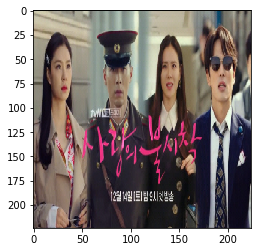

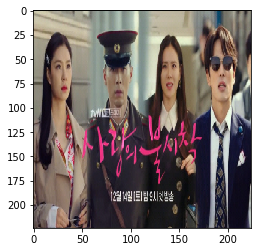

image batch size (1, 224, 224, 3)


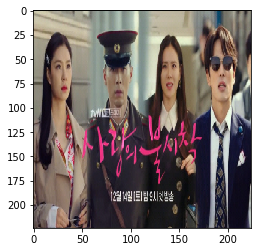

In [7]:
filename = 'a crash landing of love.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [11]:
processed_image = vgg16.preprocess_input(image_batch.copy())
print(processed_image.shape)
print(processed_image.dtype)
# print(processed_image[0])

(1, 224, 224, 3)
float32


In [12]:
predictions = vgg_model.predict(processed_image)
print(predictions.shape)  #(1, 1000)
# print(predictions)
label_vgg = decode_predictions(predictions, top=10)
print(label_vgg)

(1, 1000)
[[('n03877472', 'pajama', 0.1649196), ('n03617480', 'kimono', 0.11139199), ('n02669723', 'academic_gown', 0.095344245), ('n10148035', 'groom', 0.055328935), ('n03787032', 'mortarboard', 0.042869944), ('n04350905', 'suit', 0.034502085), ('n03041632', 'cleaver', 0.030658314), ('n04479046', 'trench_coat', 0.023823926), ('n03450230', 'gown', 0.022460228), ('n03594734', 'jean', 0.019677209)]]


In [39]:
test_datagen=ImageDataGenerator()
test_generator = test_datagen.flow_from_directory('clean-dataset/clean-dataset/train',target_size=(224,224),batch_size=3,
                                               class_mode='binary',shuffle=False)
X,T=test_generator.next()

decode_vgg=decode_predictions(vgg_model.predict(
    vgg16.preprocess_input(X.copy())),top=3)
decode_resnet=decode_predictions(resnet_model.predict(
    resnet50.preprocess_input(X.copy())),top=3)
decode_mobilenet=decode_predictions(mobilenet_model.predict(
    mobilenet.preprocess_input(X.copy())),top=3)

for i in range(X.shape[0]):
    img=cv2.resize(X[i]*255,(1000,1000))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    cv2.putText(img, "VGG16:{decode_vgg[i][0][i]}", (50,50), 
                cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
    cv2.putText(img, "resnet:{decode_resnet[i][0][i]}", (50,50), 
                cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
    cv2.putText(img, "mobilenet:{decode_mobilenet[i][0][i]}", (50,50), 
                cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),3)
    cv2.imwrite("out.jpg",img)

Found 600 images belonging to 3 classes.


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (3, 7, 7, 512)

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(vgg_model, to_file='vgg.png')

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.